# 1. Import

In [151]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, LinearLocator, AutoMinorLocator

from sklearn import preprocessing

In [152]:
# data_alert_bogor = pl.read_csv('../data/raw/aggregate_alerts_Kota Bogor.csv').to_pandas()
# data_med_irr_bogor = pl.read_csv('../data/raw/aggregate_median_irregularities_Kota Bogor.csv').to_pandas()
data = pl.read_csv('../data/raw/aggregate_median_jams_Kota Bogor.csv').to_pandas()

## 1.1 Take a look aggregate_alerts_Kota Bogor

In [153]:
# data_alert_bogor.sample(7)

In [154]:
# data_alert_bogor.info()

In [155]:
# data_alert_bogor['time'] = pd.to_datetime(data_alert_bogor['time'])

In [156]:
# categorical_col_alert_bogor = [
#     column
#     for column in data_alert_bogor.columns
#     if (len(data_alert_bogor[column].unique()) <= 100) & (column != 'street')
# ]

In [157]:
# for col in categorical_col_alert_bogor:
#     print(f'Unique values in {col}: \n{data_alert_bogor[col].unique()}\n')

## 1.2 What to do on aggregate_alerts_Kota Bogor

- Terdapat missing values pada kolom 'street', sehingga perlu dilakukan handling
- Kolom 'date' tidak terlalu penting karena sudah ada kolom time
- Kolom 'kemendagri_kabupaten_kode' dan 'kemendagri_kabupaten_nama' hanya memiliki 1 unique value jadi akan kita drop nanti
- Data tersedia dalam rentang 2 bulan dari 6 Juli 2022 hingga 6 September 2022
  - Terdapat 4 unique value di kolom 'type yaitu:
  - 'ROAD_CLOSED': Jalan Ditutup,
  - 'WEATHERHAZARD': Cuaca Buruk,
  - 'JAM': Macet,
  - 'ACCIDENT': Kecelakaan
- Feature engineering yang bisa dilakukan
  - Memecah kolom 'time' untuk mendapatkan nilai tanggal dan jam
  - Memecah kolom 'avg_location' untuk mendapatkan latitude dan longitude

In [158]:
# data_alert_bogor = data_alert_bogor.drop([0, 'date', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama'], axis=1)

## 1.3 Take a look aggregate_median_irregularities_Kota Bogor

In [159]:
# data_med_irr_bogor.sample(7)

In [160]:
# data_med_irr_bogor.info()

In [161]:
# data_med_irr_bogor['time'] = pd.to_datetime(data_med_irr_bogor['time'])

In [162]:
# categorical_col_med_irr_bogor = [
#     column
#     for column in data_med_irr_bogor.columns
#     if (len(data_med_irr_bogor[column].unique()) <= 100) & (column != 'street')
# ]

In [163]:
# for col in categorical_col_med_irr_bogor:
#     print(f'Unique values in {col}: \n{data_med_irr_bogor[col].unique()}\n')

## 1.4 What to do on aggregate_median_irregularities_Kota Bogor.csv

- Tidak ada values pada kolom 'cause_type', sehingga akan didrop nanti
- Kolom 'date' tidak terlalu penting karena sudah ada kolom time
- Kolom 'kemendagri_kabupaten_kode' dan 'kemendagri_kabupaten_nama' hanya memiliki 1 unique value jadi akan kita drop nanti
- Data tersedia dalam rentang 2 bulan dari 6 Juli 2022 hingga 6 September 2022
  - Terdapat 4 unique value di kolom 'jam_level' dan 'median_jam_level' yaitu:
  - 1: Macet Level 1,
  - 2: Macet Level 2,
  - 3: Macet Level 3,
  - 4: Macet Level 4
- Feature engineering yang bisa dilakukan
  - Memecah kolom 'time' untuk mendapatkan nilai tanggal dan jam
  - Memecah kolom 'geometry' untuk mendapatkan latitude dan longitude

In [164]:
# data_alert_bogor = data_alert_bogor.drop([0, 'date', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama'], axis=1)

## 1.5 Take a look aggregate_median_jams_Kota Bogor

In [165]:
data.sample(7)

,,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
76890,76890,2022-08-21 11:00:00.000,32.71,KOTA BOGOR,Tumenggung Wiradireja,1,580.0,78.0,11.570,1,36371174,2022-08-21,1.0,"LINESTRING (106.826053 -6.589368, 106.826289 -..."
67188,67188,2022-08-14 19:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,60,35972536,2022-08-14,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
54802,54802,2022-08-07 14:00:00.000,32.71,KOTA BOGOR,Batu Tulis,4,833.0,565.5,3.465,60,35545581,2022-08-07,4.0,"MULTILINESTRING ((106.806918 -6.618845, 106.80..."
41968,41968,2022-07-31 12:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,4,481.0,202.5,7.340,26,35095902,2022-07-31,4.0,"MULTILINESTRING ((106.814794 -6.616526, 106.81..."
33577,33577,2022-07-26 16:00:00.000,32.71,KOTA BOGOR,Kapten Muslihat,2,637.0,86.0,13.200,2,34764778,2022-07-26,2.0,"LINESTRING (106.788508 -6.595381, 106.788514 -..."
13063,13063,2022-07-14 19:00:00.000,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,60,33956027,2022-07-14,5.0,"MULTILINESTRING ((106.800516 -6.561997, 106.80..."
77809,77809,2022-08-21 20:00:00.000,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,3,951.0,97.0,14.110,27,36372088,2022-08-21,3.0,"MULTILINESTRING ((106.80627 -6.583771, 106.806..."


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102322 entries, 0 to 102321
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0                              102322 non-null  int64  
 1   time                       102322 non-null  object 
 2   kemendagri_kabupaten_kode  102322 non-null  float64
 3   kemendagri_kabupaten_nama  102322 non-null  object 
 4   street                     100529 non-null  object 
 5   level                      102322 non-null  int64  
 6   median_length              102322 non-null  float64
 7   median_delay               102322 non-null  float64
 8   median_speed_kmh           102322 non-null  float64
 9   total_records              102322 non-null  int64  
 10  id                         102322 non-null  int64  
 11  date                       102322 non-null  object 
 12  median_level               102322 non-null  float64
 13  geometry                   10

In [167]:
data.describe()

,,kemendagri_kabupaten_kode,level,median_length,median_delay,median_speed_kmh,total_records,id,median_level
count,102322.000000,1.023220e+05,102322.000000,102322.000000,102322.000000,102322.000000,102322.000000,1.023220e+05,102322.000000
mean,33353.589345,3.271000e+01,2.433758,840.802794,131.969029,14.084945,17.575673,3.539966e+07,2.433758
std,23566.968434,2.131639e-14,1.002043,549.866997,109.430777,7.975882,20.682176,1.092828e+06,1.002043
min,0.000000,3.271000e+01,1.000000,13.000000,-1.000000,0.000000,1.000000,3.346902e+07,1.000000
25%,12790.000000,3.271000e+01,2.000000,444.000000,75.000000,7.885000,4.000000,3.449331e+07,2.000000
50%,28202.500000,3.271000e+01,2.000000,727.000000,98.000000,13.060000,10.000000,3.539202e+07,2.000000
75%,53782.750000,3.271000e+01,3.000000,1138.000000,145.500000,19.090000,23.000000,3.637102e+07,3.000000
max,79363.000000,3.271000e+01,5.000000,8307.000000,2754.000000,63.614998,600.000000,3.727920e+07,5.000000


In [168]:
data['time'] = pd.to_datetime(data['time'])

### Check Unique Values

In [169]:
# Unique values for each feature
data.nunique().sort_values()

kemendagri_kabupaten_kode         1
kemendagri_kabupaten_nama         1
level                             5
median_level                      5
date                             62
total_records                   197
street                          454
time                           1465
median_delay                   1641
median_length                  3845
median_speed_kmh               9397
                              79364
geometry                      81959
id                           102322
dtype: int64

In [170]:
categorical_col_med_jam_bogor = [
    column
    for column in data.columns
    if (len(data[column].unique()) <= 100) & (column != 'street')
]

In [171]:
for col in categorical_col_med_jam_bogor:
    print(f'Unique values in {col}: \n{data[col].unique()}\n')

Unique values in kemendagri_kabupaten_kode: 
[32.71]

Unique values in kemendagri_kabupaten_nama: 
['KOTA BOGOR']

Unique values in level: 
[2 5 3 1 4]

Unique values in date: 
['2022-07-06' '2022-07-07' '2022-07-08' '2022-07-09' '2022-07-10'
 '2022-07-11' '2022-07-12' '2022-07-13' '2022-07-14' '2022-07-15'
 '2022-07-16' '2022-07-17' '2022-07-18' '2022-07-19' '2022-07-20'
 '2022-07-21' '2022-07-22' '2022-07-23' '2022-07-24' '2022-07-25'
 '2022-07-26' '2022-07-27' '2022-07-28' '2022-07-29' '2022-07-30'
 '2022-07-31' '2022-08-01' '2022-08-02' '2022-08-03' '2022-08-04'
 '2022-08-05' '2022-08-06' '2022-08-07' '2022-08-08' '2022-08-09'
 '2022-08-10' '2022-08-11' '2022-08-12' '2022-08-13' '2022-08-14'
 '2022-08-15' '2022-08-16' '2022-08-17' '2022-08-18' '2022-08-19'
 '2022-08-20' '2022-08-21' '2022-08-22' '2022-08-23' '2022-08-24'
 '2022-08-25' '2022-08-26' '2022-08-27' '2022-08-28' '2022-08-29'
 '2022-08-30' '2022-08-31' '2022-09-01' '2022-09-02' '2022-09-03'
 '2022-09-04' '2022-09-06']

Un

### Check Duplicated Data

In [172]:
data[data.duplicated() == True]

,,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry


## 1.6 What to do on aggregate_median_jams_Kota Bogor

- Terdapat missing values pada kolom 'street', sehingga perlu dilakukan handling
- Kolom 'id' merupakan primary key yang bersifat unique tiap barisnya, jadi akan kita hapus
- Kolom 'date' tidak terlalu penting karena sudah ada kolom time
- Kolom 'kemendagri_kabupaten_kode' dan 'kemendagri_kabupaten_nama' hanya memiliki 1 unique value jadi akan kita drop nanti
- Data tersedia dalam rentang 2 bulan dari 6 Juli 2022 hingga 6 September 2022
  - Terdapat 5 unique value di kolom 'level' dan 'median_level' yaitu:
  - 1: Macet Level 1,
  - 2: Macet Level 2,
  - 3: Macet Level 3,
  - 4: Macet Level 4,
  - 5: Macet Level 5
- Kolom 'median_level' akan kita hapus juga karena nilainya sama saja dengan kolom 'level'
- Feature engineering yang bisa dilakukan
  - Memecah kolom 'time' untuk mendapatkan nilai tanggal dan jam
  - Memecah kolom 'geometry' untuk mendapatkan latitude dan longitude

In [173]:
# Copy original data into a new DataFrame because we"re going to manipulate it
original_data = data.copy(deep=True)

In [174]:
data_drop_col = data.drop(['', 'date', 'kemendagri_kabupaten_kode', 'kemendagri_kabupaten_nama', 'id', 'median_level'], axis=1)

### Check Missing Values

In [175]:
percent_missing = data_drop_col.isnull().sum() * 100 / len(data_drop_col)
missing_value_df = pd.DataFrame({'column_name': data_drop_col.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
street,street,1.752311
time,time,0.000000
level,level,0.000000
median_length,median_length,0.000000
median_delay,median_delay,0.000000
median_speed_kmh,median_speed_kmh,0.000000
total_records,total_records,0.000000
geometry,geometry,0.000000


Karena hanya terdapat 1,75% missing values saja, jika kita hapus maka tidak akan terlalu mempengaruhi hasil dari analisis. Jadi kolom `street` akan kita drop

In [176]:
data_drop_miss = data_drop_col[data_drop_col['street'].notna()]
data_drop_miss.shape

(100529, 8)

# 2. Feature Engineering

In [177]:
# Extract information from Date into columns
data_time_extracted = data_drop_miss.copy(deep=True)
data_time_extracted["day"] = data_time_extracted["time"].dt.day # Extract day of month
data_time_extracted["dayofweek"] = data_time_extracted["time"].dt.weekday # Extract day of week
data_time_extracted["hour"] = data_time_extracted["time"].dt.hour # Extract hour

data_time_extracted.head()

,time,street,level,median_length,median_delay,median_speed_kmh,total_records,geometry,day,dayofweek,hour
0,2022-07-06,Pahlawan,2,784.0,62.0,20.310001,4,"MULTILINESTRING ((106.797269 -6.608899, 106.79...",6,2,0
1,2022-07-06,Tol Lingkar Luar Bogor,2,1314.0,63.0,37.710000,2,"LINESTRING (106.787027 -6.559782, 106.787701 -...",6,2,0
2,2022-07-06,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,"MULTILINESTRING ((106.800516 -6.561997, 106.80...",6,2,0
3,2022-07-06,N8 Jalan Raya Sukabumi,3,379.0,117.5,8.594999,10,"MULTILINESTRING ((106.845486 -6.6594, 106.8454...",6,2,0
4,2022-07-06,Tol Lingkar Luar Bogor,1,2438.0,87.0,42.270000,2,"LINESTRING (106.787027 -6.559782, 106.787701 -...",6,2,0


In [178]:
data_time_drop = data_time_extracted.drop(['time'], axis=1)

In [179]:
for col in ['day', 'dayofweek', 'hour']:
    print(f'Unique values in {col}: \n{data_time_drop[col].unique()}\n')

Unique values in day: 
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31  1  2  3  4  5]

Unique values in dayofweek: 
[2 3 4 5 6 0 1]

Unique values in hour: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]



Kita tidak mengekstrak ke week of year, month, atau tahun. Karena data hanya dalam rentang 2 bulan saja.

In [180]:
label_encoder = preprocessing.LabelEncoder()
data_time_drop['street']= label_encoder.fit_transform(data_time_drop['street']) 

## Data Distribution

In [181]:
target = "level"
features = [i for i in data_time_drop.columns if i not in [target]] #store all features name 
print(features)

['street', 'median_length', 'median_delay', 'median_speed_kmh', 'total_records', 'geometry', 'day', 'dayofweek', 'hour']


In [182]:
# Separate features into categorical and numerical

categorical_features = []
numerical_features = []
threshold = 100 # This is just an estimation, a categorial feature is likely to have less than 100 unique values

for feature in features:
    if feature != 'geometry':
        if data_time_drop[feature].nunique() <= threshold:
            categorical_features.append(feature)
        else:
            numerical_features.append(feature)

print(f"The Dataset has {len(categorical_features)} numerical & {len(numerical_features)} categorical features.")
print(f"Numerical features are {numerical_features}")
print(f"Categorical features are {categorical_features}")

The Dataset has 3 numerical & 5 categorical features.
Numerical features are ['street', 'median_length', 'median_delay', 'median_speed_kmh', 'total_records']
Categorical features are ['day', 'dayofweek', 'hour']


In [203]:
# Change font size for ticks
def bigger_ticks_font_size(ax):
    ax.tick_params(axis = "x", labelsize = 13)
    ax.tick_params(axis = "y", labelsize = 13)

# Change font size for labels
def bigger_label_font_size(ax, xlabel_name, ylabel_name):
    ax.set_xlabel(xlabel_name, fontsize = 16)
    ax.set_ylabel(ylabel_name, fontsize = 16)

# Function to plot categorical features using countplot
def countplot_categorical_feature(data, col_name, title, palette, order = None):
    ax = sns.countplot(x = data[col_name], order = order, palette = palette)
    plt.suptitle("'{}' Feature Distribution".format(title), fontsize = 20)
    #plt.suptitle("Annual Sales during 2010-2012", fontsize = 20)
    bigger_ticks_font_size(ax)
    bigger_label_font_size(ax, title, "Count")

# Function to annotate frequency of each category in barplot
def annotate_barplot (ax, data):
    for p in ax.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        ax.annotate("{:.1f}%".format(100.*y/data), (x.mean(), y), 
            ha = "center", va = "bottom", fontsize = 12) # set the alignment of the text

# Set double axes, count axis is on right, frequency on left
def set_double_axes(ax1, ax2, data, ax1_ax2_xlabel, ax1_ylabel, ax2_ylabel):
    ax2.yaxis.tick_left()
    ax1.yaxis.tick_right()

    # Also switch the labels over
    ax1.yaxis.set_label_position("right")
    ax2.yaxis.set_label_position("left")

    annotate_barplot (ax1, len(data)) #annotate barplot

    # Use a LinearLocator to ensure the correct number of ticks
    ax1.yaxis.set_major_locator(LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100*0.4)
    ax1.set_ylim(0,len(data)*0.4)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(MultipleLocator(10))

    # Change font size for ticks and label
    bigger_ticks_font_size(ax1)
    bigger_ticks_font_size(ax2)
    bigger_label_font_size(ax1, ax1_ax2_xlabel, ax1_ylabel)
    bigger_label_font_size(ax2, ax1_ax2_xlabel, ax2_ylabel)

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

# Create a new color palette consisted of the extracted hex codes from Set2 palette and other additional colors
palette = ["#fc8d62", "#ffd92f", "#e5c494", "#b3b3b3", "#66c2a5", "#96b9d0", "#8da0cb", "#ce94bc", "#eba7ac", "#f5ae52"]

### Data Distribution: Target

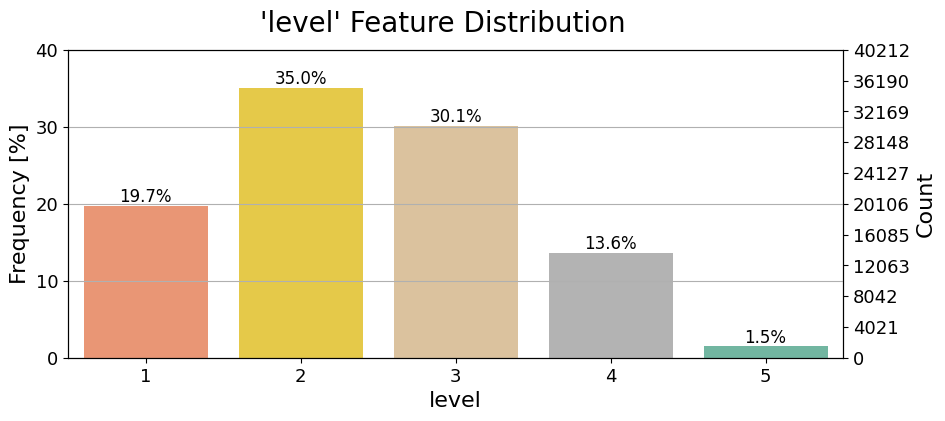

In [204]:
# Count observation for "Holiday_Flag" columnn
plt.figure(figsize=(10, 4))
ax1 = sns.countplot(x = data_time_drop["level"], data = data_time_drop, palette = palette)

ax2 = ax1.twinx() # Make twin axis
set_double_axes(ax1, ax2, data_time_drop, "level", "Count", "Frequency [%]")
plt.suptitle("'level' Feature Distribution", fontsize = 20)

# ax1.yaxis.labelpad = 15 # Increase label padding
plt.show()

### Data Distribution: Numerical Features

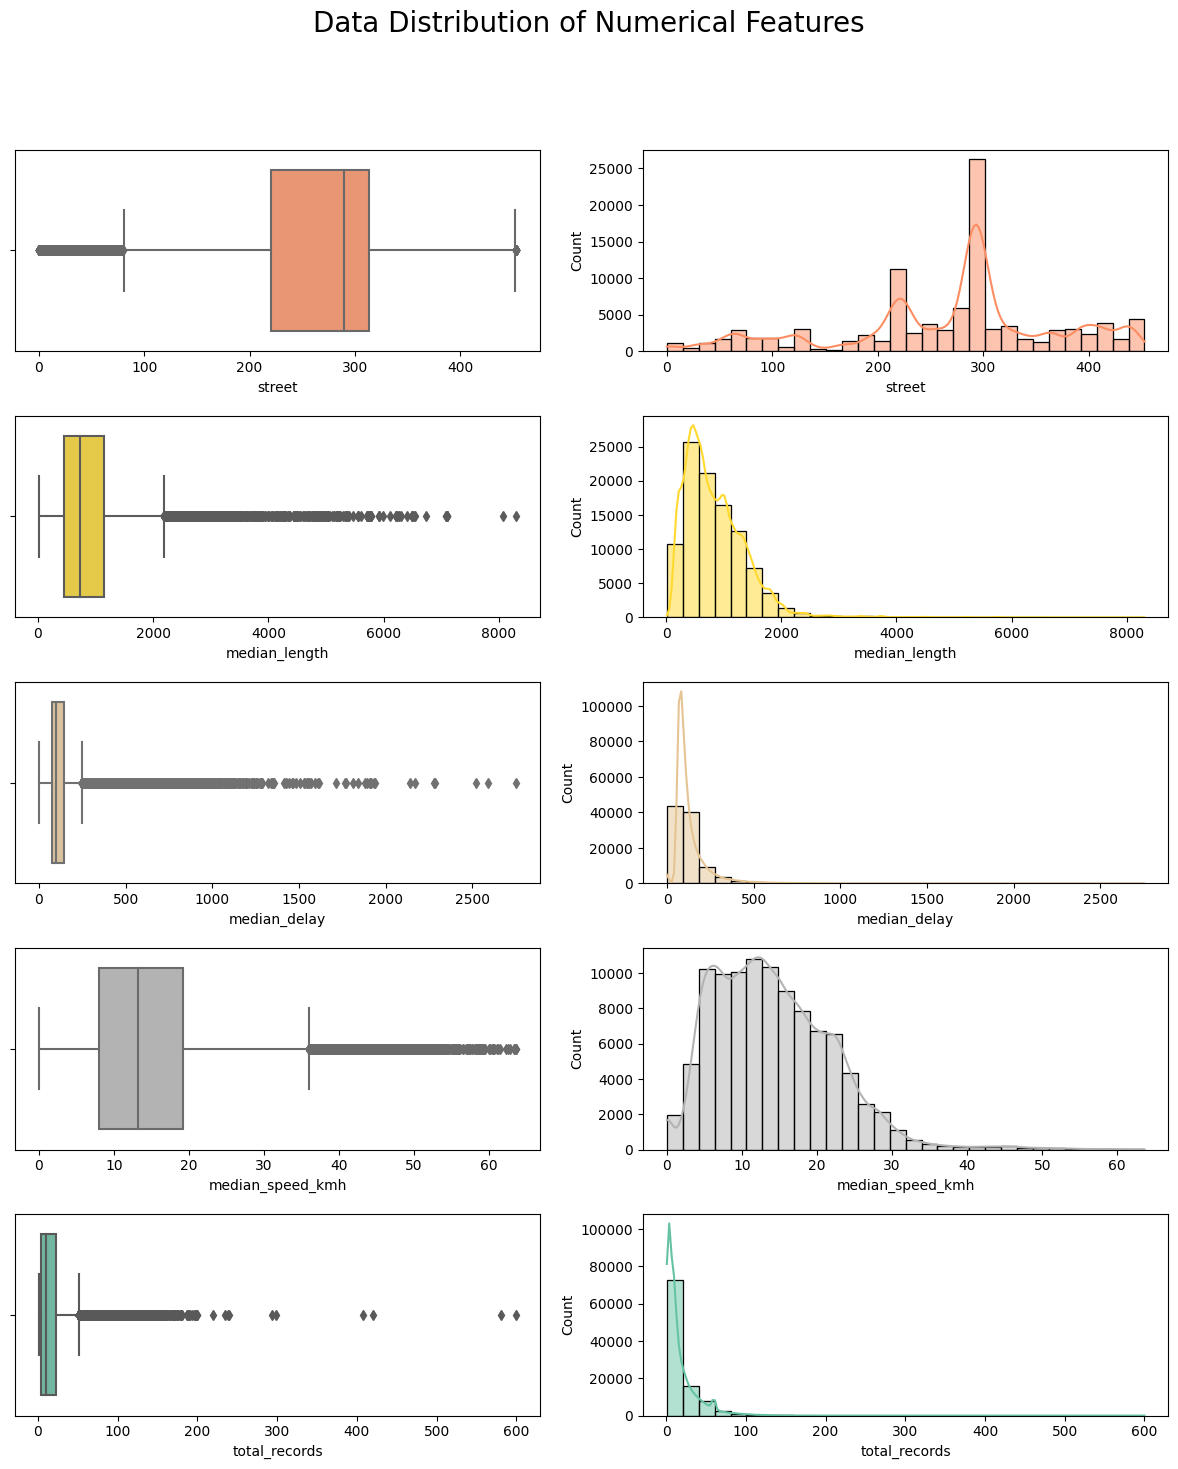

In [187]:
# Outlier plotting using boxplot

fig, ax = plt.subplots(ncols = 2, nrows = len(numerical_features), figsize=(12, 14))
for i in enumerate (numerical_features):
  sns.boxplot(x = data_time_drop[i[1]], data = data_time_drop, color = palette[i[0]], ax = ax[i[0]][0])
  sns.histplot(x = data_time_drop[i[1]], color = palette[i[0]], kde = True, bins = 30, ax = ax[i[0]][1])

fig.suptitle("Data Distribution of Numerical Features", fontsize = 20, y=1.05)
sns.set_context(font_scale = 5)
plt.tight_layout(pad = 1.5)

Almost all of these columns have data that are skewed to the left, except for the street column.

### Data Distribution: Categorical Features

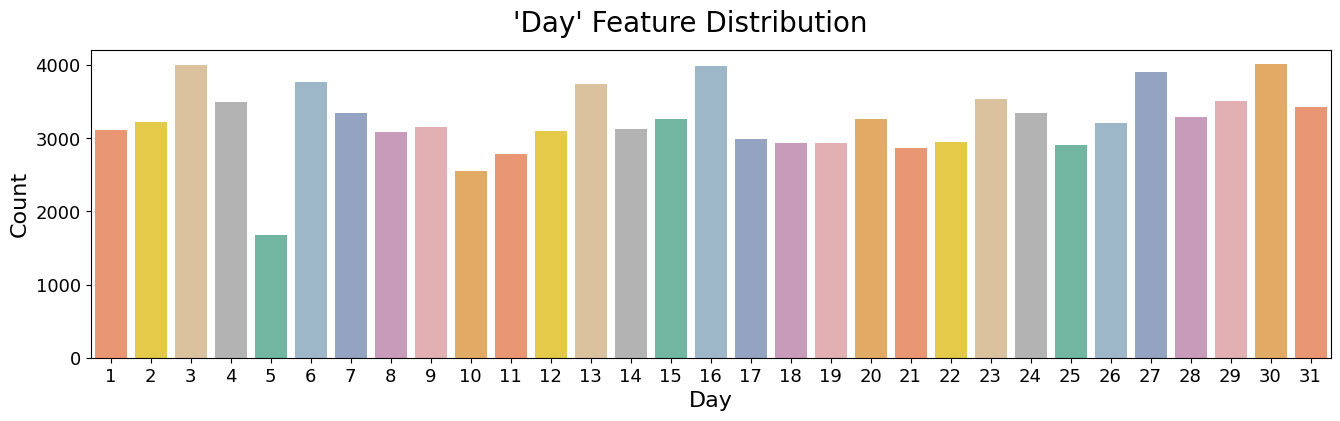

In [188]:
# Plot "Week of Year" Feature
plt.figure(figsize=(16,4))
countplot_categorical_feature(data_time_drop, "day", "Day", palette) #order by frequency

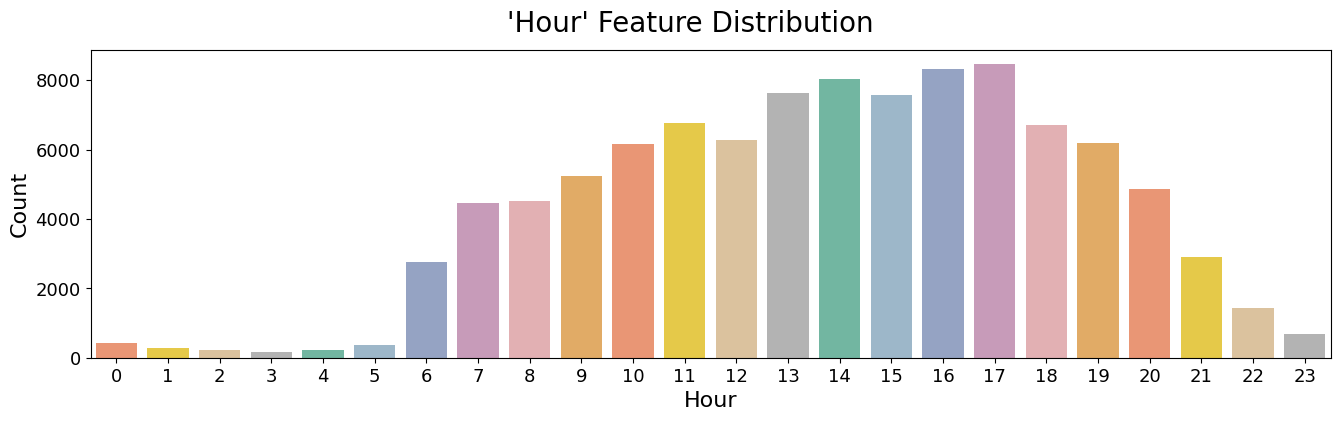

In [189]:
# Plot "Week of Year" Feature
plt.figure(figsize=(16,4))
countplot_categorical_feature(data_time_drop, "hour", "Hour", palette) #order by frequency

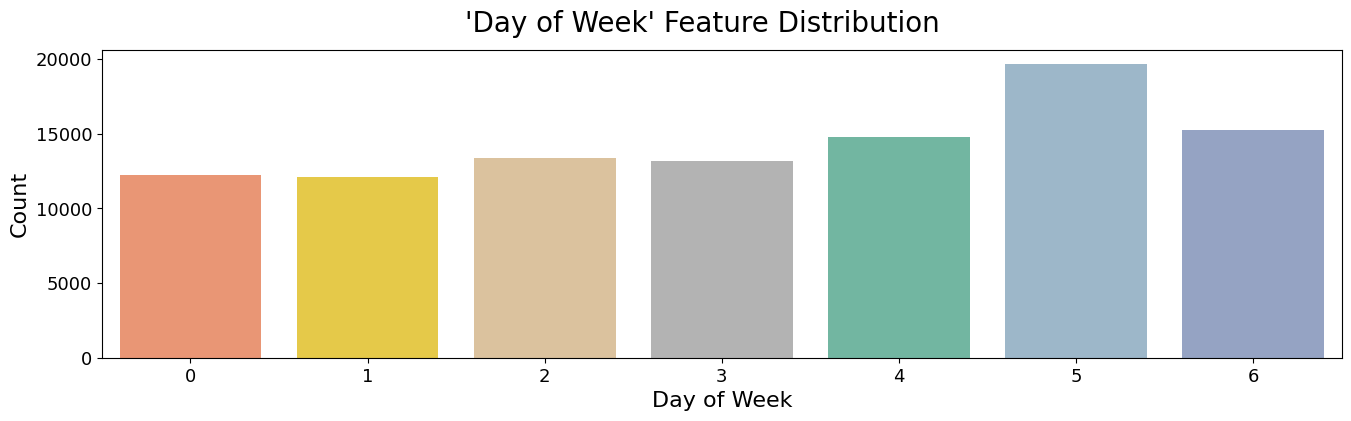

In [190]:
# Plot "Week of Year" Feature
plt.figure(figsize=(16,4))
countplot_categorical_feature(data_time_drop, "dayofweek", "Day of Week", palette) #order by frequency